<a href="https://colab.research.google.com/github/ashishkumarsaklani/AIML/blob/main/Clustering_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#cluster project

#importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

import re
import itertools
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#custom functions

In [3]:

class TextCategorizer:
    def __init__(self, cluster_count=50):
        self.cluster_count = cluster_count
        self.stemmer = PorterStemmer()
        self.vectorizer = TfidfVectorizer()
        self.kmeans = KMeans(n_clusters=self.cluster_count)
        self.representative_titles = {}

    def normalize_text(self, text):
        # Normalizing text: correcting spelling mistakes, converting to lowercase, and standardizing casing
        return text.lower()

#    def fit(self, text_column):
#        normalized_text = text_column.apply(self.normalize_text)
#        self.vectorizer.fit(normalized_text)
#        X = self.vectorizer.transform(normalized_text)
#        self.clusters = self.kmeans.fit_predict(X)
#        self.representative_titles = self._find_representative_titles(text_column)

    def fit(self, text_column):
        normalized_text_column = text_column.copy()  # Make a copy of the original text column
        normalized_text_column = normalized_text_column.apply(self.normalize_text)
        self.vectorizer.fit(normalized_text_column)
        X = self.vectorizer.transform(normalized_text_column)
        self.clusters = self.kmeans.fit_predict(X)
        self.representative_titles = self._find_representative_titles(text_column)

    def _find_representative_titles(self, text_column):
        top_job_titles = list(text_column.value_counts().head(self.cluster_count).index)# correction made here self.cluster_count *2
        representative_titles = {}
        for cluster_id in range(self.cluster_count):
            cluster_indices = [i for i, label in enumerate(self.clusters) if label == cluster_id]
            cluster_job_titles = text_column.iloc[cluster_indices]
            # Filter out non-English or meaningless job titles
            cluster_job_titles = cluster_job_titles[cluster_job_titles.isin(top_job_titles)]
            # Select the most common job title in the cluster
            common_job_title = cluster_job_titles.value_counts().index[0] if not cluster_job_titles.empty else 'Others'
            representative_titles[cluster_id] = common_job_title
        return representative_titles

    def predict(self, text_column):
        normalized_text = text_column.apply(self.normalize_text)
        X = self.vectorizer.transform(normalized_text)
        predicted_clusters = self.kmeans.predict(X)
        return [self.representative_titles[cluster_id] for cluster_id in predicted_clusters]

In [4]:

class TextCategorizer2:
    def __init__(self, cluster_count=30):
        self.cluster_count = cluster_count
        self.stemmer = PorterStemmer()
        self.vectorizer = TfidfVectorizer()
        self.kmeans = KMeans(n_clusters=self.cluster_count)
        self.representative_titles = {}

    def normalize_text(self, text):
        # Normalizing text: correcting spelling mistakes, converting to lowercase, and standardizing casing
        return text.lower()

#    def fit(self, text_column):
#        normalized_text = text_column.apply(self.normalize_text)
#        self.vectorizer.fit(normalized_text)
#        X = self.vectorizer.transform(normalized_text)
#        self.clusters = self.kmeans.fit_predict(X)
#        self.representative_titles = self._find_representative_titles(text_column)

    def fit(self, text_column):
        normalized_text_column = text_column.copy()  # Make a copy of the original text column
        normalized_text_column = normalized_text_column.apply(self.normalize_text)
        self.vectorizer.fit(normalized_text_column)
        X = self.vectorizer.transform(normalized_text_column)
        self.clusters = self.kmeans.fit_predict(X)
        self.representative_titles = self._find_representative_titles(text_column)

    def _find_representative_titles(self, text_column):
        top_job_titles = list(text_column.value_counts().head(self.cluster_count * 2).index)
        representative_titles = {}
        for cluster_id in range(self.cluster_count):
            cluster_indices = [i for i, label in enumerate(self.clusters) if label == cluster_id]
            cluster_job_titles = text_column.iloc[cluster_indices]
            # Filter out non-English or meaningless job titles
            cluster_job_titles = cluster_job_titles[cluster_job_titles.isin(top_job_titles)]
            # Select the most common job title in the cluster
            common_job_title = cluster_job_titles.value_counts().index[0] if not cluster_job_titles.empty else 'Others'
            representative_titles[cluster_id] = common_job_title
        return representative_titles

    def predict(self, text_column):
        normalized_text = text_column.apply(self.normalize_text)
        X = self.vectorizer.transform(normalized_text)
        predicted_clusters = self.kmeans.predict(X)
        return [self.representative_titles[cluster_id] for cluster_id in predicted_clusters]

In [5]:
# Normalisation of text string and preprocessor for nltk

#import pandas as pd
#import re
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cluster import KMeans
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize

class TextCategorizer_clustering:
    def __init__(self, n_clusters=90):
        self.n_clusters = n_clusters
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.vectorizer = TfidfVectorizer()
        self.kmeans = KMeans(n_clusters=self.n_clusters)
        self.representative_titles = {}

    def preprocess_text(self, text):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)
        tokens = [self.stemmer.stem(token) for token in tokens if token not in self.stop_words]


        #print (tokens)# for debug
        return ' '.join(tokens)

    def fit(self, text_column):
        text_data = pd.DataFrame(text_column)
        text_data = text_data.fillna('Not Disclosed')  # Fill NaN values

        #print(1,"Text data:")
        #print(text_data.head())  # Print the first few rows of text data to verify it's correctly loaded

        preprocessed_text = text_data.iloc[:, 0].apply(self.preprocess_text)

        #print(2,"Preprocessed text:")
        #print(preprocessed_text.head())  # Print the first few preprocessed texts to verify preprocessing is working

        X = self.vectorizer.fit_transform(preprocessed_text)

        #print(3,"Vocabulary:")
        #print(self.vectorizer.get_feature_names()[:10])  # Print the first few feature names to verify vocabulary creation

        self.clusters = self.kmeans.fit_predict(X)
        self.representative_titles = self._find_representative_titles(text_data.iloc[:,0])




    def _find_representative_titles(self, text_data):
        representative_titles = {}
        for cluster_id in range(self.n_clusters):
            cluster_indices = [i for i, label in enumerate(self.clusters) if label == cluster_id]
            common_job_titles = text_data.iloc[cluster_indices].value_counts().index[0]  # Get most common title
            representative_titles[cluster_id] = common_job_titles
        return representative_titles

    def predict(self, text_column):
        return text_column.apply(lambda x: self._assign_clean_title(x))

    def _assign_clean_title(self, text):
        if pd.isna(text):
            return 'Not Disclosed'
        try:
            cluster_id = self.clusters[list(self.vectorizer.transform([text]))[0].argmax()]
            return self.representative_titles.get(cluster_id, 'Others')
        except ValueError:
            return 'Other'

In [6]:
class IQROutlierDetector:

  def __init__(self, data, column_name):

    self.data = data
    self.column_name = column_name

  def detect_outliers(self):


    if not pd.api.types.is_numeric_dtype(self.data[self.column_name]):
      #print(f"Warning: Column '{self.column_name}' is not numerical. Skipping outlier detection.")
      return None  # Indicate non-numerical column

    q1 = self.data[self.column_name].quantile(0.25)
    q3 = self.data[self.column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = self.data[(self.data[self.column_name] < lower_bound) | (self.data[self.column_name] > upper_bound)].index.tolist()
    return outliers

  def get_outlier_count(self):

    outliers = self.detect_outliers()
    if outliers is None:
        return 0  # Handle case of non-numerical column
    else:
        return len(outliers)

  def get_outlier_percentage(self):

    outlier_count = self.get_outlier_count()
    total_data_points = len(self.data)
    if total_data_points > 0:
        return (outlier_count / total_data_points) * 100
    else:
        return 0  # Handle case of empty data

  def drop_outliers(self):

    outliers = self.detect_outliers()
    if outliers is None:
        return self.data  # Return original data if column is not numerical
    else:
        return self.data.drop(outliers)

In [7]:
#custom Encoder
class CustomEncoder:
    def __init__(self):
        self.encoding_dict = {}  # Dictionary to store encoding mappings
        self.counter = 1  # Counter to assign integer encoding values

    def fit_transform(self, series):
        encoded_list = []  # List to store encoded values

        # Count the frequency of each item in the series
        frequency_count = series.value_counts().sort_values(ascending=False)

        # Iterate through the series based on frequency count
        for item in series:
            if pd.isna(item):
                encoded_list.append(item)
            elif item not in self.encoding_dict:
                self.encoding_dict[item] = self.counter
                self.counter += 1
                encoded_list.append(self.encoding_dict[item])
            else:
                encoded_list.append(self.encoding_dict[item])

        return encoded_list, self.encoding_dict

    def inverse_transform(self, encoded_list, encoding_dict):
        reverse_dict = {v: k for k, v in encoding_dict.items()}  # Reverse the dictionary for decoding
        return [reverse_dict[encoded_value] if encoded_value in reverse_dict else encoded_value for encoded_value in encoded_list]

In [8]:
import pandas as pd
from sklearn.impute import KNNImputer

class KNNBatchImputer(KNNImputer):
    def __init__(self, batch_size=500, n_neighbors=5):
        super().__init__(n_neighbors=n_neighbors)  # Inherit from KNNImputer
        self.batch_size = batch_size

    def fit_transform(self, df):
        data_filled = pd.DataFrame()
        num_batches = len(df) // self.batch_size + (1 if len(df) % self.batch_size != 0 else 0)

        for i in range(num_batches):
            start_idx = i * self.batch_size
            end_idx = min((i + 1) * self.batch_size, len(df))
            batch_data = df.iloc[start_idx:end_idx].copy()

            imputer = KNNImputer(n_neighbors=self.n_neighbors)  # Create KNNImputer for each batch
            batch_data_filled = pd.DataFrame(imputer.fit_transform(batch_data), columns=batch_data.columns)

            data_filled = pd.concat([data_filled, batch_data_filled], ignore_index=True)

        return data_filled

# Example usage
#df_filled = KNNImputerWithBatching(batch_size=500, n_neighbors=5).fit_transform(df.copy())  # Avoid modifying original df
#print(df_filled.isnull().sum())  # Check for remaining missing values

In [9]:

import pandas as pd
from sklearn.impute import KNNImputer

class KNNImputerWithCustomEncoder1:
    def __init__(self, batch_size=500, n_neighbors=5, custom_encoder=None):
        self.batch_size = batch_size
        self.n_neighbors = n_neighbors
        self.custom_encoder = custom_encoder
        self.encoding_dicts = {}

    def fit_transform(self, df):
        data_filled = pd.DataFrame()
        num_batches = len(df) // self.batch_size + (1 if len(df) % self.batch_size != 0 else 0)

        for i in range(num_batches):
            start_idx = i * self.batch_size
            end_idx = min((i + 1) * self.batch_size, len(df))
            batch_data = df.iloc[start_idx:end_idx].copy()

            self._encode_unsupported_types(batch_data)
            imputer = KNNImputer(n_neighbors=self.n_neighbors)
            batch_data_filled = pd.DataFrame(imputer.fit_transform(batch_data), columns=batch_data.columns)
            self._decode_unsupported_types(batch_data_filled)

            data_filled = pd.concat([data_filled, batch_data_filled], ignore_index=True)

        return data_filled

    def _encode_unsupported_types(self, df):
        for col in df.columns:
            if df[col].dtype not in ('int64', 'float64'):
                if df[col].dtype == 'object':
                    df[col], encoding_dict = self.custom_encoder.fit_transform(df[col])
                    self.encoding_dicts[col] = encoding_dict

    def _decode_unsupported_types(self, df):
        for col in df.columns:
            if col in self.encoding_dicts:
                df[col] = self.custom_encoder.inverse_transform(   np.round(np.array(df[col])).astype('int64')  , self.encoding_dicts[col])


# Example usage:
# custom_encoder = CustomEncoder()  # Initialize your custom encoder
# imputer = KNNImputerWithCustomEncoder(custom_encoder=custom_encoder)
# df_filled = imputer.fit_transform(df)
# print(df_filled)

In [10]:
#from sklearn.cluster import KMeans, GaussianMixture, DBSCAN

class Clustering:
    def __init__(self,data):
        self.data = data
        data.dropna(inplace=True)
        pass

    def kmeans(self, data, features, n_clusters=3, random_state=42):
        X = data[features]
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        data['Kmean'] = kmeans.fit_predict(X)

    def gmm(self, data, features, n_components=3, random_state=42):
        X = data[features]
        gmm = GaussianMixture(n_components=n_components, random_state=random_state)
        data['GMM'] = gmm.fit_predict(X)

    def dbscan(self, data, features, eps=1, min_samples=5):
        X = data[features]
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['DBSCAN'] = dbscan.fit_predict(X)

In [11]:
def check_missing(data):
   #print( df.iloc[-3:,-2:])
   for col in data.columns:
      Mi = data[col].isna().sum()
      print(f"{Mi}  : {col}")

#Importing Data

In [12]:

url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


#Renaming columns for my convenience

In [13]:
df.rename(columns={
'Unnamed: 0':'sn',
'company_hash':'company',
'email_hash':'email',
'orgyear':'j_year',
'job_position':'position',
'ctc_updated_year':'i_year'
},inplace=True)

#Checking Duplicates

In [14]:
#checking if there are duplicate and total
df.duplicated().sum()

0

In [15]:
#No reason to remove duplicate from seprate columns
for col in df.columns:
   dup = df[col].duplicated().sum()
   print(f"{dup} :{col}")

0 :sn
168543 :company
52400 :email
205765 :j_year
202483 :ctc
204826 :position
205836 :i_year


#Unique Values

In [16]:
df.nunique()

sn          205843
company      37299
email       153443
j_year          77
ctc           3360
position      1016
i_year           7
dtype: int64

#Outlier detection and removal

In [17]:
for col in df.columns:
  detector = IQROutlierDetector(df, col)
  outlier_indices = detector.detect_outliers()
  #print("Outlier indices:", outlier_indices)

  outlier_count = detector.get_outlier_count()
  outlier_percentage = round(detector.get_outlier_percentage(),2)
  if detector.get_outlier_count() > 0 :
    print(f"{col} Outlier count:", outlier_count)
    print(f"{col} Outlier Percentage:", outlier_percentage, "%")
    df = detector.drop_outliers()

j_year Outlier count: 7764
j_year Outlier Percentage: 3.77 %
ctc Outlier count: 12366
ctc Outlier Percentage: 6.24 %
i_year Outlier count: 2610
i_year Outlier Percentage: 1.41 %


#Checking for Missing Values

In [18]:

# Count the number of rows with NaN values
nan_count = df.isna().any(axis=1).sum()

# Drop rows with NaN values
df.dropna(inplace=True)

print(f"Dropped {nan_count} rows with NaN values.")



# Check if there are any NaN values in the DataFrame
if df.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

Dropped 48314 rows with NaN values.
There are no NaN values in the DataFrame.


In [19]:
#Now checking for missing values
check_missing(df)

0  : sn
0  : company
0  : email
0  : j_year
0  : ctc
0  : position
0  : i_year


In [20]:
#removing missing values from company and J_year as the account is low
df.dropna(subset= ['company','j_year'],inplace=True,axis=0)

In [21]:
#Now checking for missing values
check_missing(df)

0  : sn
0  : company
0  : email
0  : j_year
0  : ctc
0  : position
0  : i_year


Changing datatype

In [22]:
df['j_year']=df['j_year'].astype('int64')
df['i_year']=df['i_year'].astype('int64')

In [23]:

#input_series = df['position']
#df['position'], pos_dict = encoder.fit_transform(input_series)
#input_series = df['company']
#df['company'], com_dict = encoder.fit_transform(input_series)
#input_series = df['email']
#df['email'], ema_dict = encoder.fit_transform(input_series)

In [24]:

encoder = CustomEncoder()  # Create an instance of CustomEncoder

imputer = KNNImputerWithCustomEncoder1(custom_encoder = encoder)
df_filled = imputer.fit_transform(df)
df = df_filled
check_missing(df)

0  : sn
0  : company
0  : email
0  : j_year
0  : ctc
0  : position
0  : i_year


In [25]:
# Create an instance of the class
categorizer = TextCategorizer()

# Fit the model on the text column
categorizer.fit(df['position'])


# Predict categories for new text data
df['predicted'] = categorizer.predict(df['position'])

# Print the results
#print(df[['position', 'predicted']].head(30))

In [26]:
print(
df[['position','predicted']][-10:])
print(f"unique position count:{df['position'].nunique()},unique predicted count: {df['predicted'].nunique()}")

                  position           predicted
134779    Backend Engineer    Backend Engineer
134780      Data Scientist      Data Scientist
134781  FullStack Engineer  FullStack Engineer
134782    Backend Engineer    Backend Engineer
134783    Backend Engineer    Backend Engineer
134784  FullStack Engineer  FullStack Engineer
134785  FullStack Engineer  FullStack Engineer
134786      Data Scientist      Data Scientist
134787      Data Scientist      Data Scientist
134788   Frontend Engineer   Frontend Engineer
unique position count:871,unique predicted count: 40


#filtering doubtful data
data where increment was given before joining

In [27]:


df = df[~(df['i_year'] < df['j_year'])]

#df[df['i_year'] < df['j_year']].iloc[:5,-5:]

df = df[~(df['position'] != df['predicted'])]

df['position'] = df['predicted']

df.drop(columns=['sn','predicted'],inplace=True)



#

#Converting encoding text to int

In [28]:

encoder = CustomEncoder()

input_series = df['position']
df['position'], pos_dict = encoder.fit_transform(input_series)

input_series = df['company']
df['company'], com_dict = encoder.fit_transform(input_series)

input_series = df['email']
df['email'], ema_dict = encoder.fit_transform(input_series)

#Addig New features

In [29]:


# Feature 1: Average CTC Increase Rate (fill NaN with 0)
df['ctc_change'] = ((df['ctc'] - df.groupby('email')['ctc'].shift()) / (df['j_year'] - df.groupby('email')['j_year'].shift())).fillna(0)

# Feature 2: Position Change Frequency
df['job_change'] = df.groupby('email')['position'].transform('nunique')

# Feature 3: Job Stability Indicator

# Group by 'email' column and check for duplicates in 'position' column within each group
grouped_duplicates = df.groupby('email')['position'].apply(lambda x: x.duplicated(keep=False))

# Fill NaN values (no duplicates) with False
grouped_duplicates.fillna(False, inplace=True)

# Convert boolean values to integers (0 for False, 1 for True)
job_stability = grouped_duplicates.astype(int)

# Ensure compatibility of the index before assignment
job_stability.index = df.index

# Assign the 'job_stability' values to the DataFrame
df['job_stability'] = job_stability





# Feature 4: Industry Experience
current_year = 2025  # Change this to the current year
df['experience'] = current_year - df['j_year']


df['employee_count']= df['company'].map(df['company'].value_counts())
# Display the modified dataframe
df.head()

,company,email,j_year,ctc,position,i_year,ctc_change,job_change,job_stability,experience,employee_count
0,41,29879,2016.0,1100000.0,1,2020.0,0.0,2,0,9.0,9
1,42,29880,2018.0,449999.0,2,2019.0,0.0,2,0,7.0,295
2,43,29881,2015.0,2000000.0,3,2020.0,0.0,1,0,10.0,1
3,44,29882,2017.0,700000.0,3,2019.0,0.0,1,0,8.0,45
4,45,29883,2017.0,1400000.0,2,2019.0,0.0,2,1,8.0,5


In [30]:

#df = df.astype('int64')

#df.describe()

check_missing(df)
#df.info()
mi_df = df[df['job_stability'].isna()]
mi_df

0  : company
0  : email
0  : j_year
0  : ctc
0  : position
0  : i_year
0  : ctc_change
0  : job_change
0  : job_stability
0  : experience
0  : employee_count


,company,email,j_year,ctc,position,i_year,ctc_change,job_change,job_stability,experience,employee_count


In [31]:
check_missing(df)

features=['ctc', 'j_year', 'job_stability', 'experience', 'i_year', 'ctc_change', 'job_change']
for col in df.columns:
    detector = IQROutlierDetector(df,col)
    df = detector.drop_outliers()

0  : company
0  : email
0  : j_year
0  : ctc
0  : position
0  : i_year
0  : ctc_change
0  : job_change
0  : job_stability
0  : experience
0  : employee_count


In [32]:

# Usage example:
clustering = Clustering(df)
data = df[['ctc', 'j_year', 'job_stability', 'experience', 'i_year', 'ctc_change', 'job_change']]
# Perform KMeans clustering
clustering.kmeans(df, features)

# Perform GMM clustering
clustering.gmm(df, features)
# Perform DBSCAN clustering
clustering.dbscan(df, features,eps=100)

In [33]:
df

,company,email,j_year,ctc,position,i_year,ctc_change,job_change,job_stability,experience,employee_count,Kmean,GMM,DBSCAN
2,43,29881,2015.0,2000000.0,3,2020.0,0.0,1,0,10.0,1,2,2,0
3,44,29882,2017.0,700000.0,3,2019.0,0.0,1,0,8.0,45,1,1,1
7,48,29886,2019.0,400000.0,3,2019.0,0.0,1,0,6.0,14,1,1,2
8,49,29887,2019.0,420000.0,2,2020.0,0.0,1,0,6.0,227,1,1,3
9,50,29888,2016.0,600000.0,4,2021.0,0.0,1,0,9.0,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134775,3324,142124,2020.0,1600000.0,2,2021.0,0.0,1,0,5.0,10,0,0,37
134776,1212,142125,2016.0,1060000.0,6,2021.0,0.0,1,0,9.0,748,0,0,21
134781,5674,142126,2020.0,420000.0,2,2021.0,0.0,1,0,5.0,28,1,1,3
134783,738,142128,2021.0,1000000.0,3,2021.0,0.0,1,0,4.0,51,0,1,27


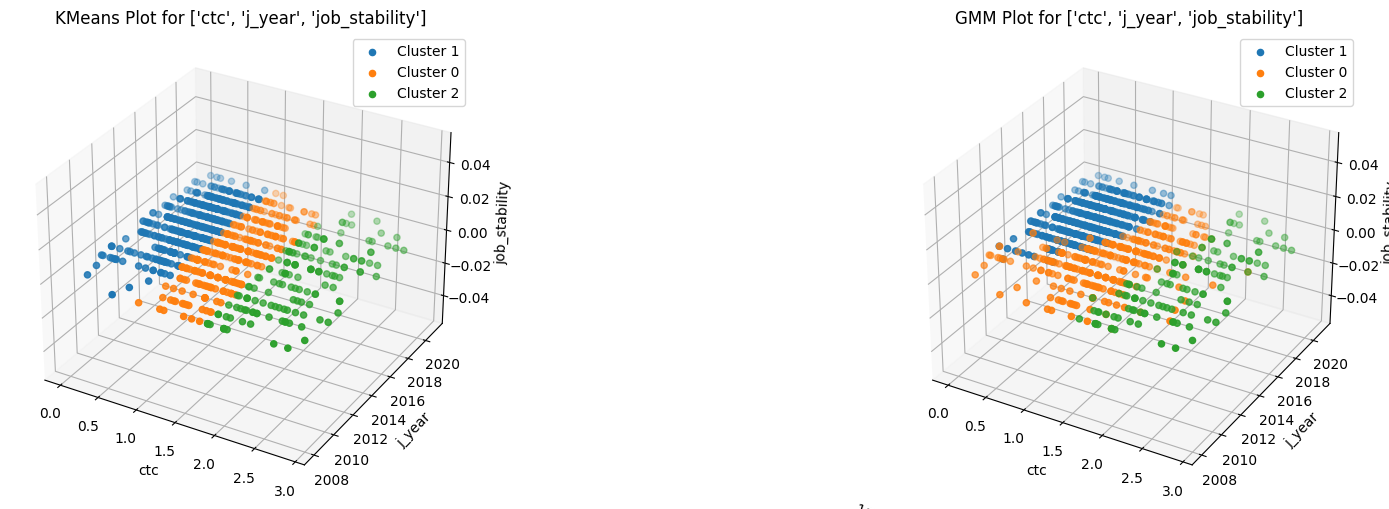

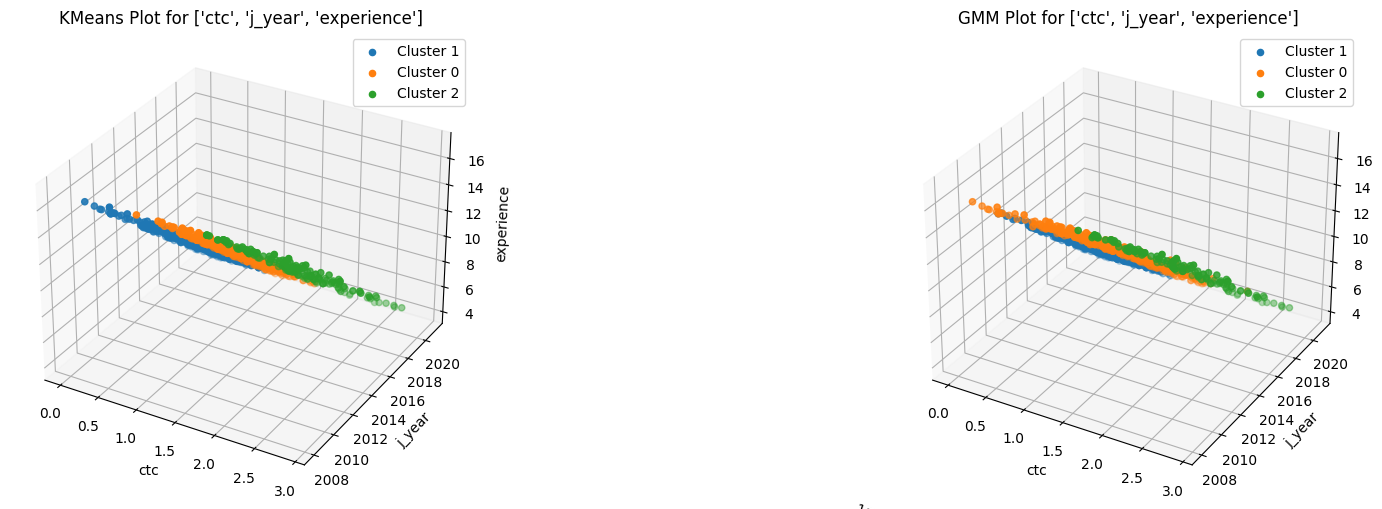

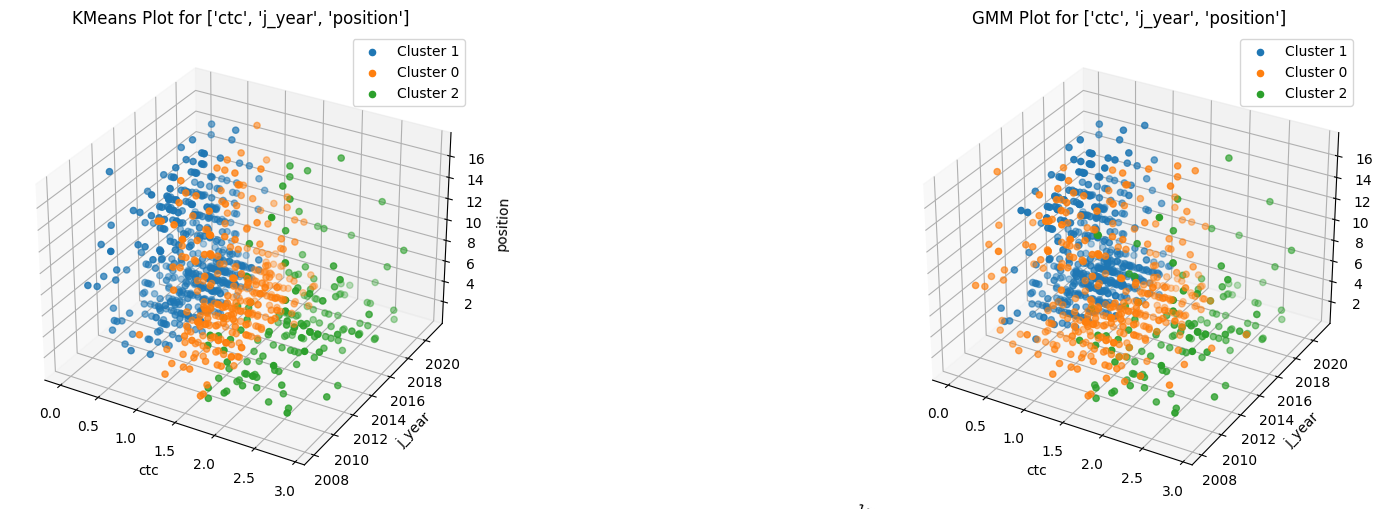

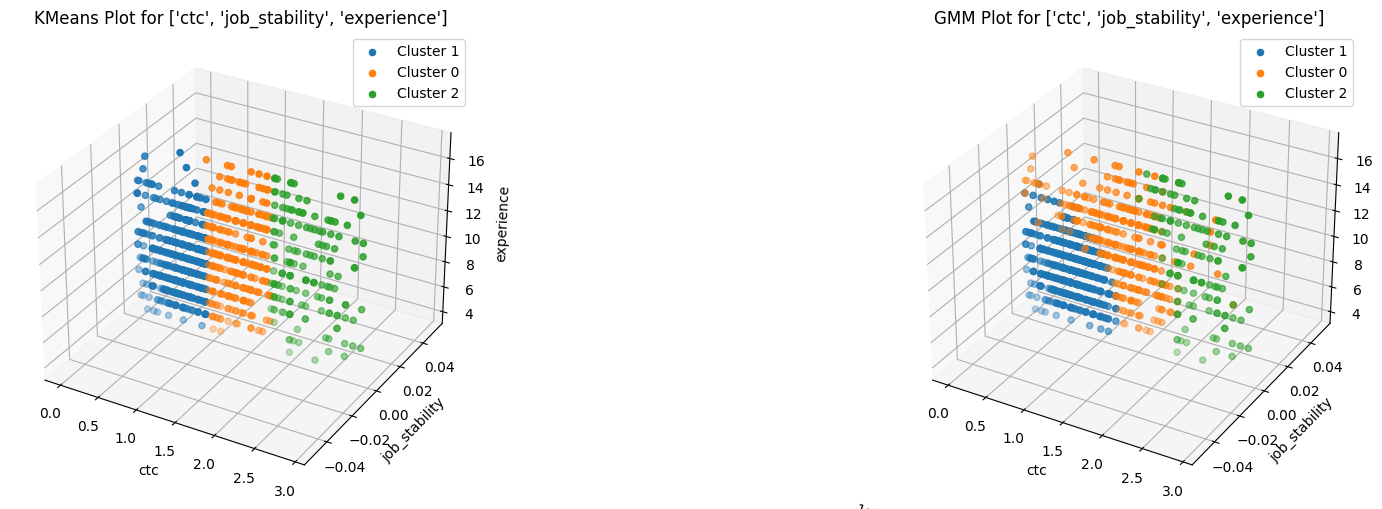

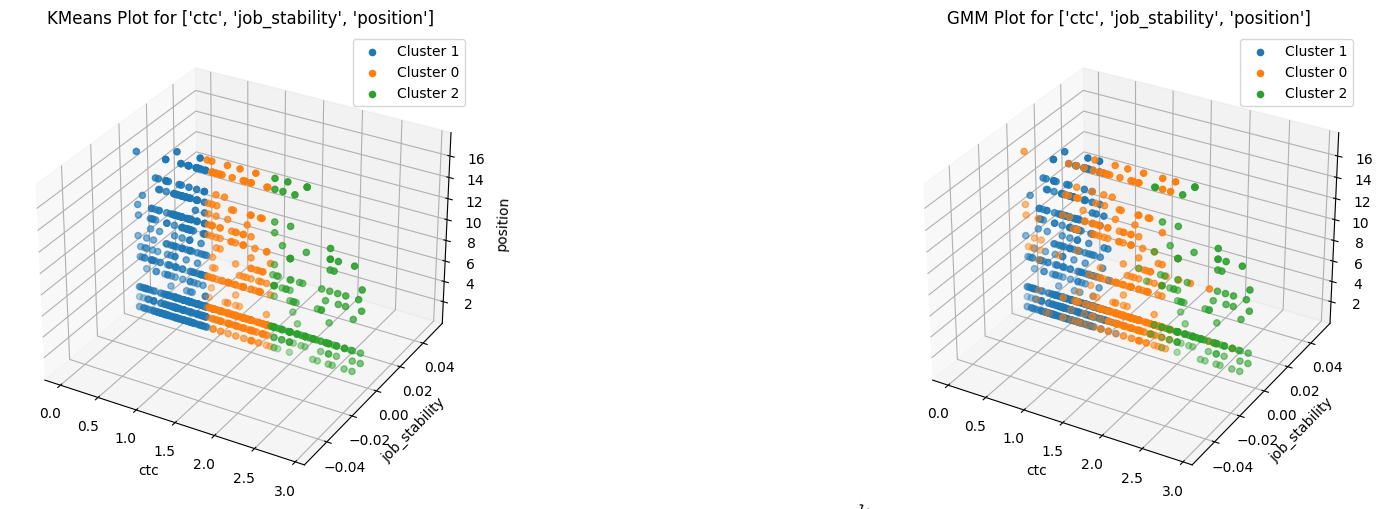

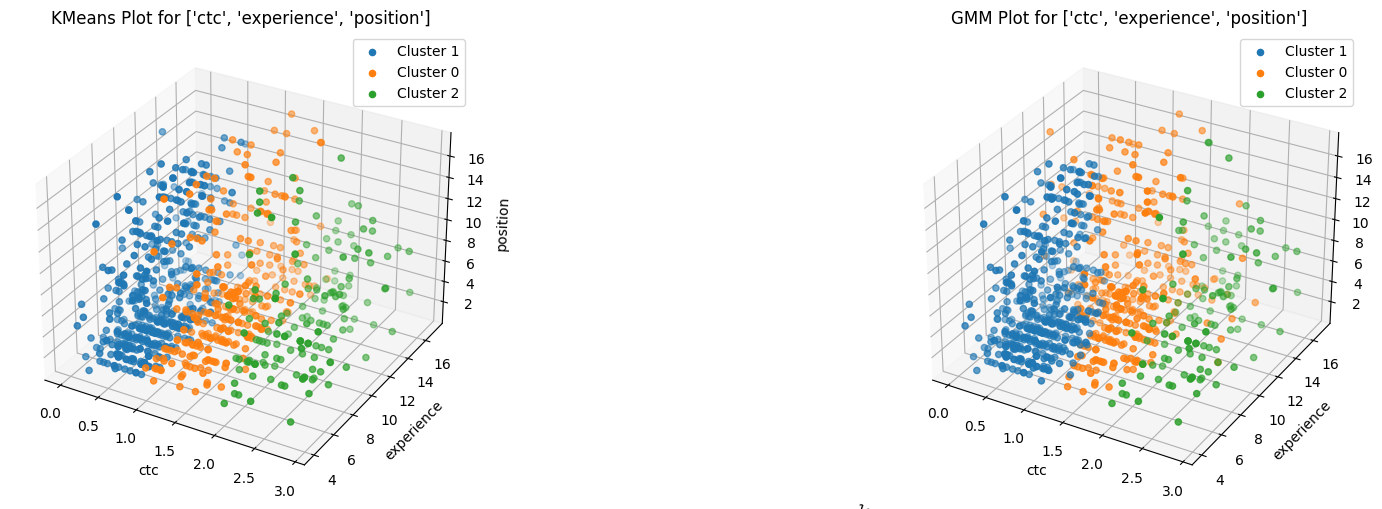

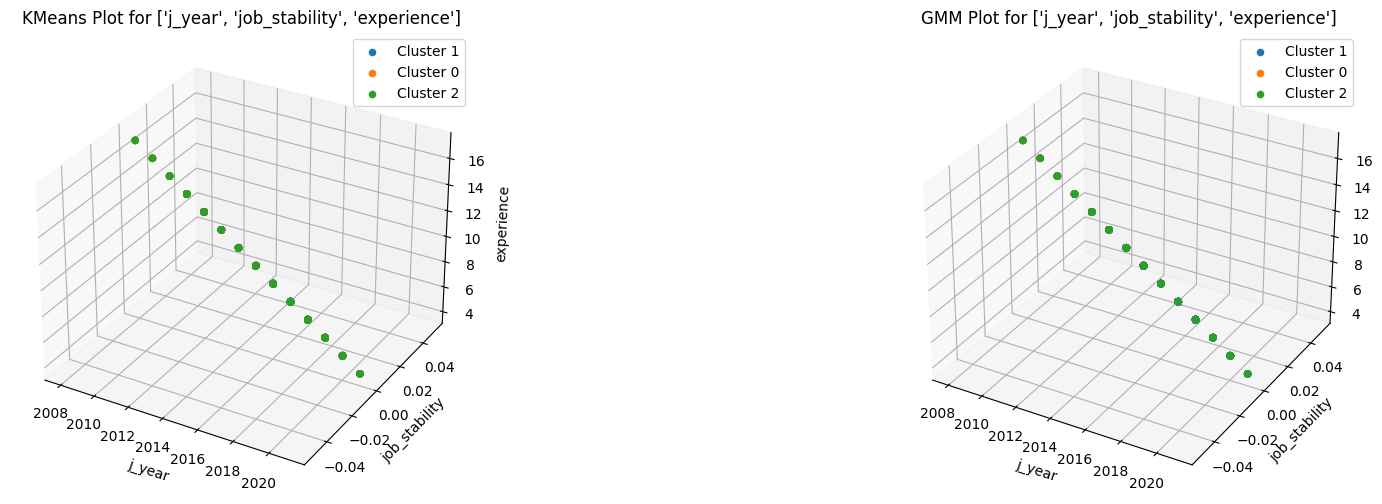

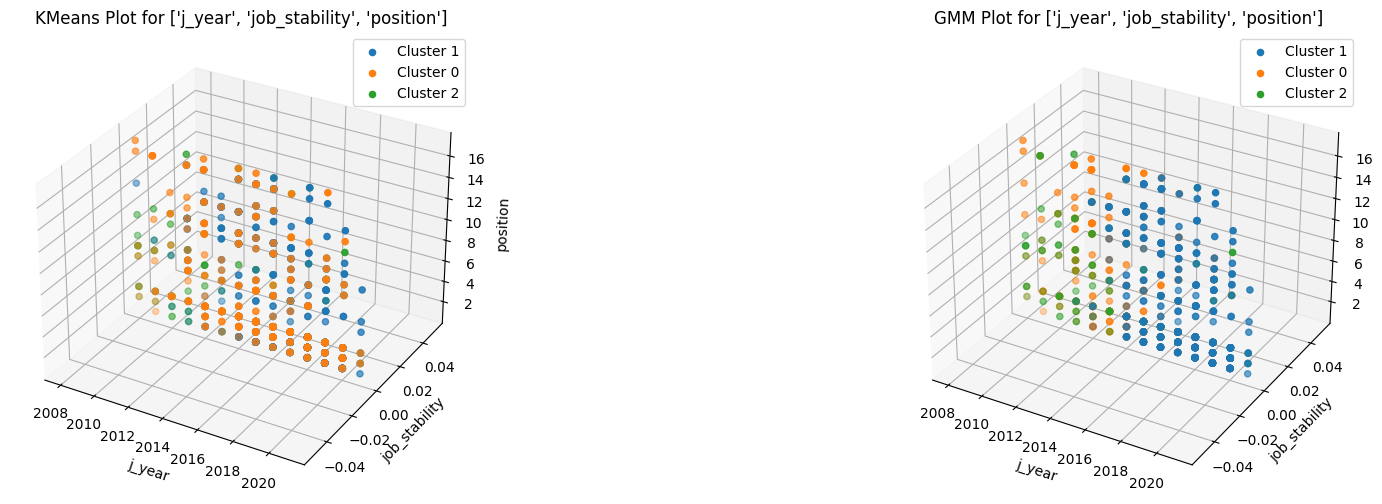

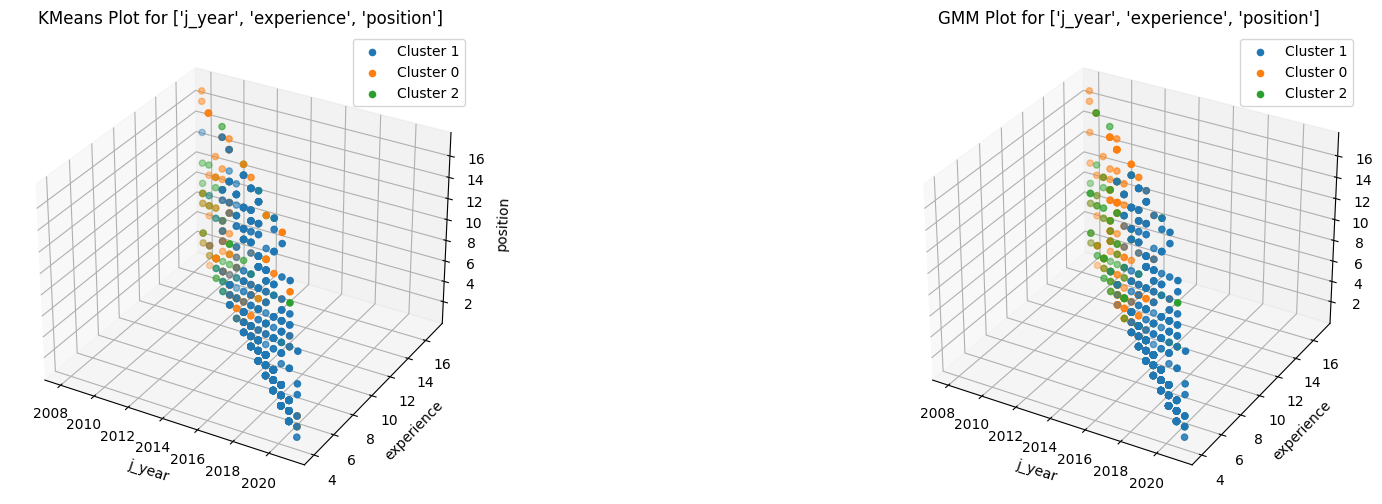

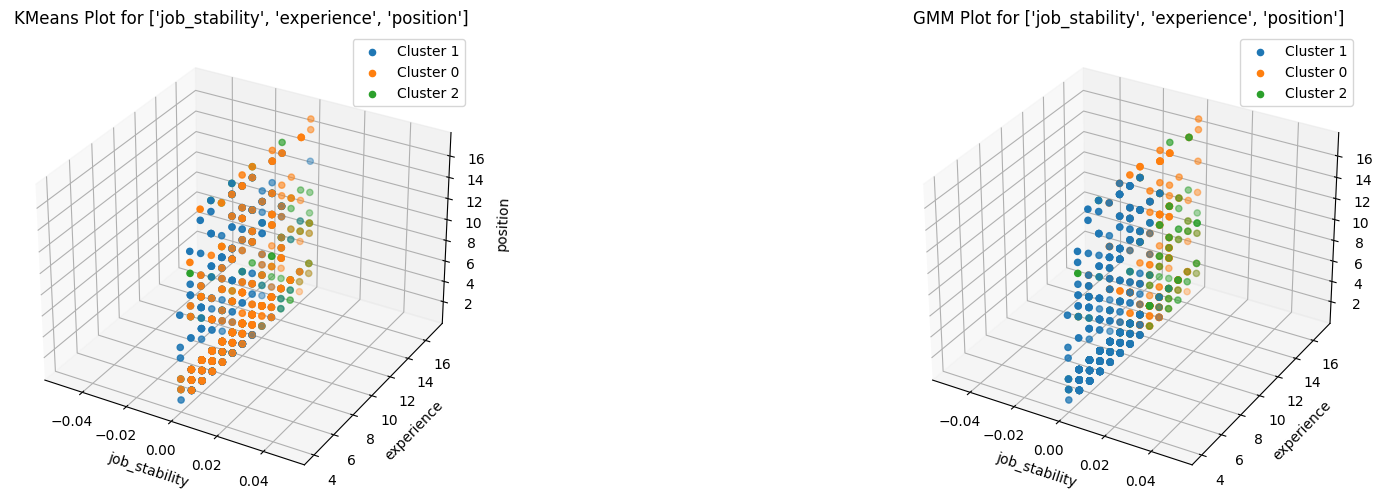

In [37]:
from mpl_toolkits.mplot3d import Axes3D





# Sample the dataframe with a fixed number of rows
df_k = df.sample(n=1000, random_state=42)


# Create an instance of the Clustering class
clustering = Clustering(df_k)

# Define features for clustering
features = ['ctc', 'j_year', 'job_stability', 'experience', 'position', 'i_year', 'company', 'ctc_change', 'job_change']

# Generate all combinations of 3 features
feature_combinations = list(itertools.combinations(features, 3))




# Plot KMeans, GMM, and DBScan for each set of features
for i, combo in enumerate(feature_combinations, start=1):
    if all(col in df_k.columns for col in combo):
        # Create subplots
        fig, axs = plt.subplots(1, 2, figsize=(21, 6), subplot_kw={'projection': '3d'})

        combo= list(combo)
        X = df_k[combo]
        # Continue with clustering
        clustering.kmeans(X, combo)
        clustering.gmm(X, combo)
        clustering.dbscan(X, combo)

        # Plot KMeans
        ax = axs[0]  # First subplot
        for cluster in df_k['Kmean'].unique():
            cluster_df = df_k[df_k['Kmean'] == cluster]
            ax.scatter(cluster_df[combo[0]], cluster_df[combo[1]], cluster_df[combo[2]], label=f'Cluster {cluster}')
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.set_title(f'KMeans Plot for {combo}')
        ax.legend()

        # Plot GMM
        ax = axs[1]  # Second subplot
        for cluster in df_k['GMM'].unique():
            cluster_df = df_k[df_k['GMM'] == cluster]
            ax.scatter(cluster_df[combo[0]], cluster_df[combo[1]], cluster_df[combo[2]], label=f'Cluster {cluster}')
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.set_title(f'GMM Plot for {combo}')
        ax.legend()

        # Plot DBScan
       # ax = axs[2]  # Third subplot
        #for cluster in df_k['DBSCAN'].unique():
       #     cluster_df = df_k[df_k['DBSCAN'] == cluster]
        #    ax.scatter(cluster_df[combo[0]], cluster_df[combo[1]], cluster_df[combo[2]], label=f'Cluster {cluster}')
        #ax.set_xlabel(combo[0])
       # ax.set_ylabel(combo[1])
       # ax.set_zlabel(combo[2])
       # ax.set_title(f'DBScan Plot for {combo}')
        #ax.legend()

        plt.show()